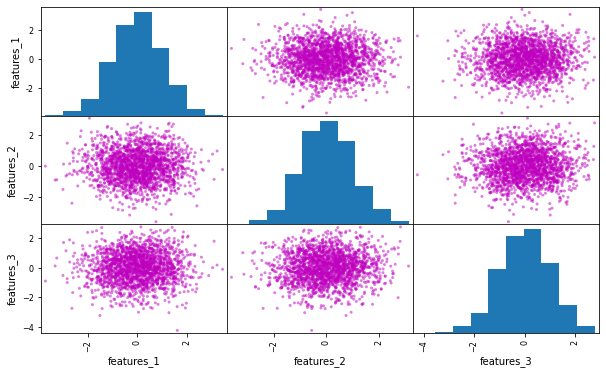

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

#1.------------------------------
#url = "https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv"
#!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
regfile=pd.read_csv("regression_generated.csv")
tmp = pd.plotting.scatter_matrix(regfile[['features_1','features_2', 'features_3']],figsize=(10,6), c="m", grid='True')
correle = regfile[['features_1','features_2', 'features_3']].corr()
#the features are not correlated


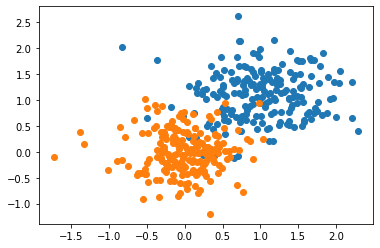

In [9]:
#2. Color-coded scatter plot------------
def gaussian(mean,sta_dev) : 
    return np.random.normal(mean,sta_dev,200)

x1 = gaussian(1,0.5)
y1 = gaussian(1,0.5)
plt.scatter(x1,y1)

x2 = gaussian(0,0.4)
y2 = gaussian(0,0.4)
plt.scatter(x2,y2)

plt.show()

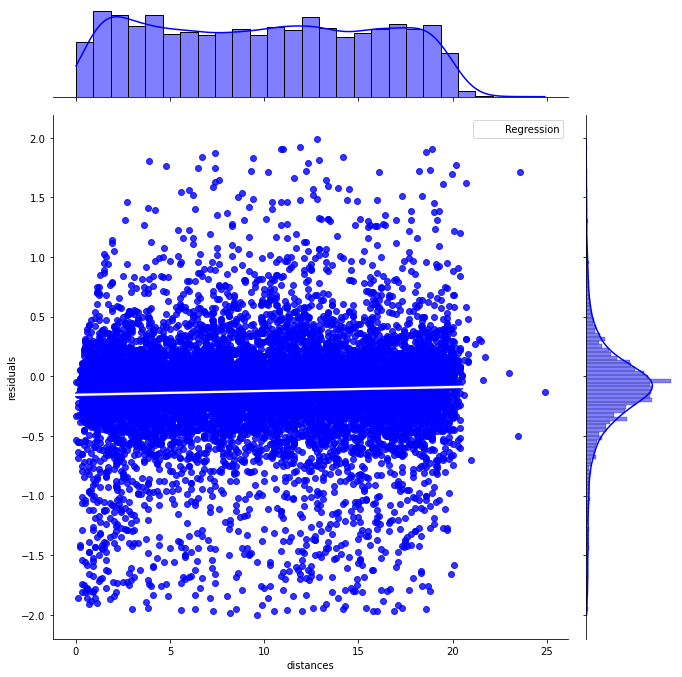

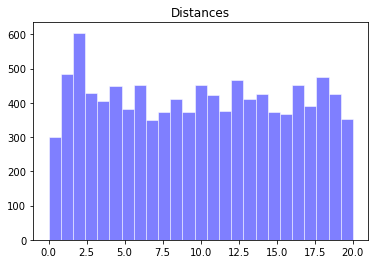

x:
 [ 0.4  1.2  2.   2.8  3.6  4.4  5.2  6.   6.8  7.6  8.4  9.2 10.  10.8
 11.6 12.4 13.2 14.  14.8 15.6 16.4 17.2 18.  18.8 19.6]

y:
 [-0.23334013605442772, -0.15755664004732142, -0.17261881149154032, -0.17265891472867756, -0.1411489841986534, -0.1253149206349072, -0.13273011717775512, -0.14486896842993777, -0.09200968754262727, -0.06308125923400477, -0.10698127600554033, -0.07129621095749959, -0.0826782297908158, -0.06445007317348095, -0.09530335934848333, -0.0836770451770448, -0.10805016799907265, -0.160195282807955, -0.16657834101381522, -0.10807084526461247, -0.12948735777497009, -0.18194154183413255, -0.12654025062656765, -0.11727137254902373, -0.03681678773205391]

error:
 [0.4700588141456736, 0.4556535903066799, 0.4169192860411484, 0.42788007790199306, 0.4145615791705033, 0.369011886951562, 0.3717367903448502, 0.46749845511383126, 0.43991848237494285, 0.4384711211211888, 0.4388084887426329, 0.4179427411798105, 0.4309307340516104, 0.4569439831599643, 0.47166644112030204, 0.484

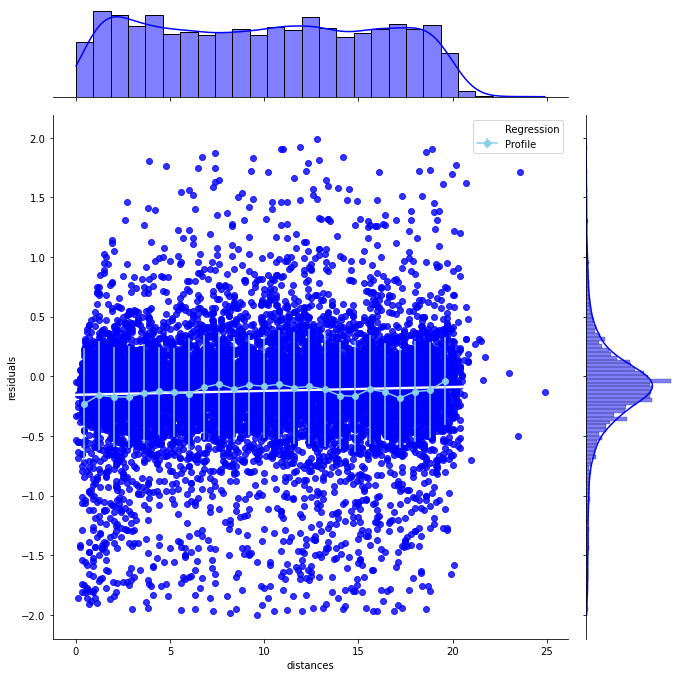

In [39]:
import seaborn as sns
import math
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

#3. Profile plot---------
residualdata = np.load('data/residuals_261.pkl', allow_pickle=True).item()
df = pd.DataFrame(residualdata) 
df = df[abs(df['residuals'])<2]

jp = sns.jointplot(x='distances', y='residuals', data=df, kind="reg", color="blue", joint_kws={'line_kws':{'color':'white', 'label':'Regression'}})
jp.ax_joint.legend()
jp.fig.set_size_inches(10,10)
plt.show()

bin = 25
(n, bins, patches) = plt.hist(df['distances'], bins=bin, facecolor='blue', alpha=0.5, edgecolor='white', range=(0,20))
plt.title("Distances")
plt.show()

x=(bins[1:]+bins[:-1])*0.5
print("x:\n", x)
y = [df["residuals"][(df['distances'] >=bins[i]) & (df['distances']<=bins[i+1])].mean() for i in range(bin)]
print("\ny:\n", y)
err_y = [df["residuals"][(df['distances'] >bins[i]) & (df['distances']<bins[i+1])].std() for i in range(bin)]
print("\nerror:\n", err_y)


jp2 = sns.jointplot(x='distances', y='residuals', data=df, kind="reg", color="blue", joint_kws={'line_kws':{'color':'white', 'label':'Regression'}})
jp2.fig.set_size_inches(10,10)
plt.sca(jp2.ax_joint)
plt.errorbar(x=x, y=y , yerr=err_y, marker = 'o', color = 'skyblue', xlolims=22, label="Profile") 
plt.legend()
plt.show()


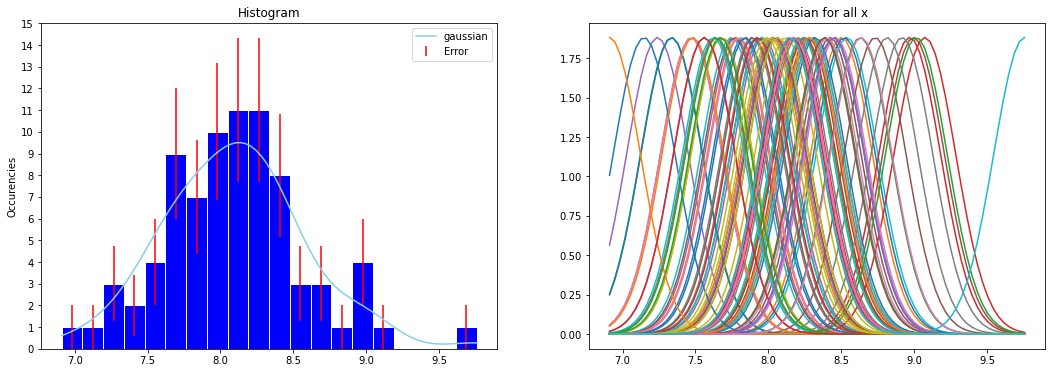

In [15]:
from scipy import stats
import scipy
from matplotlib.ticker import AutoMinorLocator

#4. Kernel Density Estimate--------
mean = 8
std = 0.5
No=80
binsNo = int(No/4)
x = mean + std * np.random.randn(No)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 6)) #create a figure

bins = ax1.hist(x, bins=binsNo, color='blue',edgecolor='white')
ax1.set_title('Histogram')
ax1.set_ylabel('Occurencies')
ax1.set_yticks(np.arange(0, No, 1)) 
error = np.sqrt(bins[0])
bins_center = 0.5 * (bins[1][:-1] + bins[1][1:])
ax1.errorbar(bins_center, bins[0], yerr=error, fmt='none', color='red', label="Error")

gauss=[]
std_def = 1.06 * x.std() * x.size**(-1/5)
linespace = np.linspace(np.min(x), np.max(x), No)
ax2.set_title("Gaussian for all x ")
for item in x:
    nrm = stats.norm(item, std_def)
    gauss.append(nrm.pdf(linespace))
    ax2.plot(linespace, gauss[-1])

histArea = sum(np.diff(bins[1])*bins[0])
guassArea = scipy.integrate.trapz(np.sum(gauss, axis=0), linespace)
kNorm = guassArea/histArea
guassNorm = np.sum(gauss, axis=0)/kNorm

ax1.plot(linespace, guassNorm, color="skyblue", label="gaussian")
ax1.legend()
plt.show()